In [174]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage
from skimage.io import imsave


np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [175]:
img ="sample_image.jpg"

In [176]:
%%time
def grayscale(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 13.8 µs


In [177]:
def dodge(front,back):
    result=front*255/(255-back) 
    result[result>255]=255
    result[back==255]=255
    return result.astype('uint8')

In [178]:
s = imageio.imread(img)
g = grayscale(s)
i = 255-g
b = scipy.ndimage.filters.gaussian_filter(i,sigma=5)
r = dodge(b,g)

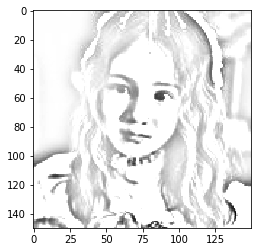

In [179]:
a = plt.imshow(r, cmap="gray")

In [180]:
imsave('hasil.png', r)